# <span style="color:#0b486b">  FIT5215: Deep Learning (2022)</span>
***
*CE/Lecturer:*  **Dr Trung Le** | trunglm@monash.edu <br/> <br/>
*Tutor:*  **Mr Tuan Nguyen**  \[tuan.ng@monash.edu \] |**Mr Anh Bui** \[tuananh.bui@monash.edu\] | **Mr Xiaohao Yang** \[xiaohao.yang@monash.edu \] | **Mr Md Mohaimenuzzaman** \[md.mohaimen@monash.edu \] |**Mr Thanh Nguyen** \[Thanh.Nguyen4@monash.edu \] |
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
******

# <span style="color:#0b486b">Tutorial 3: Stochastic Gradient Descent and Optimization</span> #
**The purpose of this tutorial is to help you understand and visualize gradients of machine learning algorithms as well as the optimization of deep learning with TensorFlow. The tutorial consists of two parts:**

I. Visualize the gradient of the training of a logistic regression model on a synthetic dataset

II. Show the training procedure of a DNN model on the MNIST dataset

**References and additional reading and resources**
- An overview of gradient descent optimization algorithms ([link](https://ruder.io/optimizing-gradient-descent/)).
- Logistic Regression ([link](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)).
- TensorFlow Keras model ([link](https://www.tensorflow.org/api_docs/python/tf/keras/Model)).


## <span style="color:#0b486b"> I. Visualize the gradient of the training of a logistic regression model on a synthetic dataset </span> <span style="color:red;  font-size: 18px">***** (highly important)</span>

### <span style="color:#0b486b"> I.1 Introduction of logistic regression </span>

Logistic regression can be viewed as a simple neural network for binary classification with the input and output layers.
- The input layer takes inputs as one feature vector (data point, data instance, or data example), mini-batches of feature vectors, or entire dataset of feature vectors.
- The output layer has one neuron and was applied with the activation function, i.e., sigmoid to obtain the predicted probability of a given data instance to be in the positive class (i.e., the class 1).

We choose logistic regression to visually demonstrate the processes of forward/backward propagations for performing SGD (Stochastic Gradient Descend) updates to solve the optimization problem behind logistic regression. This would offer you a better understanding of using forward/backward propagations when training deep neural networks. With the implementation in this part, you will enjoy the learning of how to feed a mini-batch to a network, do forward propagation, define the loss function, and then perform backward propagation for computing the gradients for updating the model in an SGD manner.

For the ease of comprehensibility, we present the technical details for the case of a synthetic dataset with two features (i.e., data point $x \in \mathbb{R}^{2}$), meaning that the input layer has two neurons. However, the implementation can be generalized to a general case with many features (i.e., data point $x \in \mathbb{R}^{d}$).

The architecture of logistic regression is shown in the following figure.


<img src="imgs/LogisticRegression.png" width="500" align="center"/>

The model parameters of our simple logistic regression include $W=\left[\begin{array}{c}
w_{1}\\
w_{2}
\end{array}\right]\in\mathbb{R}^{2\times1}$. Here note that we do not use the bias to simplify the model for the visualizing purpose in the following steps. Let us denote the training set as $D=\left\{ (x^{1},y^{1}),(x^{2},y^{2})...,(x^{N},y^{N})\right\}$ where data point and feature vector $x^i = [x^i_1, x^i_2] \in \mathbb{R}^{1\times 2}$ and label $y^i \in \{0,1\}$.

#### <span style="color:#0b486b"> Forward propagation </span>

The computational process of logistic regression for a data point $x \in \mathbb{R}^{1\times 2}$ with the label $y \in \{0,1\}$ is as follows:
- We feed $x \in \mathbb{R}^{1\times2}$ to the logistic regression network.
- We compute: $z= xW \in \mathbb{R}^{1\times 1}$.
- We apply sigmoid over $z$: $p = sigmoid(z) \in\mathbb{R}^{1\times 1}$.

$p$ represents the probability that $x$ is classified as positive class or equivalently $p = p(y=1 \mid x) =sigmoid(z)= \frac{1}{1+e^{-z}}= \frac{1}{1+e^{-xW}}$. The loss incurred is as follows:
- $l(x,y;W) = -y*log(p) - (1-y)*log(1-p)$. Your task is to explain why it is.

The loss incurred by the entire dataset is as follows:
- $l(W,D)=\frac{1}{N}\sum_{i=1}^{N}l(x^{i},y^{i};W)$

To efficiently solve the above optimization problem, we apply SGD in which at each iteration we feed a mini-batch $X$ to the network and then rely on backward propagation to compute the gradient of the loss function w.r.t. to $W$ for the current mini-batch.

The computational process of logistic regression for a mini-batch $X \in \mathbb{R}^{batch\_size\times2}$ with labels $y \in \mathbb{R}^{batch\_size\times1}$ is as follows:
- We feed a mini-batch $X=\left[\begin{array}{cc}
b_{1}^{1} & b_{2}^{1}\\
b_{1}^{2} & b_{2}^{2}\\
... & ...\\
b_{1}^{batch\_size} & b_{2}^{batch\_size}
\end{array}\right]\in\mathbb{R}^{batch\_size\times2}$ of 2D feature vectors (data points) to our logistic regression network.
- We compute $z = XW \in \mathbb{R}^{batch\_size\times 1}$.
- We apply sigmoid over $z$: $p = sigmoid(z) \in \mathbb{R}^{batch\_size\times 1}$.

The loss incurred by the current mini-batch is as follows:
- $l(W,X)=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}l(b^{i},y^{i};W)=-\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}\left[y^{i}\log p^{i}+(1-y^{i})\log(1-p^{i})\right]$ where $p^{i} = p(y^i=1 \mid b^i) = sigmoid(z^i)= \frac{1}{1+e^{-z^i}}= \frac{1}{1+e^{-b^iW}}$.


#### <span style="color:#0b486b"> Backward propagation </span>

We now compute the gradient of the loss incurred by a mini-batch $l(W,X)$ w.r.t. the model parameter $W$. This can be done conveniently via backward propagation with some matrix multiplications. The mathematical tool for this derivation is the chain rule based on the computational process of the forward propagation.
- $z = XW$ --> $p = sigmoid(z)$ --> $l = - mean(y*log(p) + (1-y)*log(1-p))$ where $*$ is element-wise product between two vectors.

We derive as follows:
 - $ \frac{\partial l}{\partial W}	=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}\frac{\partial l(b_{i},y_{i};W)}{\partial W}=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}\frac{\partial l(b_{i},y_{i};W)}{\partial p^{i}}\frac{\partial p^{i}}{\partial z^{i}}\frac{\partial z^{i}}{\partial W}
	=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}\left[\frac{-y^{i}}{p^{i}}+\frac{1-y^{i}}{1-p^{i}}\right]p^{i}\left(1-p^{i}\right)b^{i}$

To facilitate the computation, we can rewrite the above derivative in the form of matrix multiplication as follows:
- $\frac{\partial l}{\partial W}=mean\left(X^{T}\left[\left(\frac{-y}{p}+\frac{1-y}{1-p}\right)*p*(1-p)\right]\right)\in\mathbb{R}^{2\times1}$.

#### <span style="color:#0b486b"> SGD update </span>

We update the model based on the gradient of the mini-batch w.r.t. $W$ as:
- $W = W - \eta*\frac{\partial l}{\partial W}$ where $\eta >0$ is the learning rate.

### <span style="color:#0b486b"> I.2 Implementation of logistic regression </span>

#### **<span style="color:#0b486b"> First, we create a simple synthetic dataset for logistic regressions </span>**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

C:\Users\vngu0061\Anaconda3\envs\teaching\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


We would like to generate a few data points on a two-dimensional axis and assume that the optimal coefficient of the logistic regression is known to us.

In [2]:
W_opt = np.array([[1],[2]], dtype=np.float64) # the optimal W
print(W_opt)

[[1.]
 [2.]]


We generate the training set of 2D data points.

In [3]:
# Randomly generate 500 synthetic data points
N = 500
delta = 2
X1 = (np.random.rand(N) -0.5)*2*delta
X2 = (np.random.rand(N) -0.5)*2*delta
X_train = np.array([x for x in zip(X1,X2)])
print("X_train shape: {}".format(X_train.shape))

X_train shape: (500, 2)


We assign labels (i.e., $0$ or $1$) for the data points according to if they stay on what side of the optimal hyperplane (W_opt).

In [4]:
# Generate the labels for those data points
y_value = X_train.dot(W_opt) + np.random.normal(0.0, 0.2)
y_train = np.ones([N,1])
y_train[np.where(y_value <0)]= 0
num_pos = len(np.argwhere(y_train==1)[:,0])
num_neg = len(np.argwhere(y_train==0)[:,0])
print("Number of positive labels: {}, number of negative labels: {}".format(num_pos, num_neg))

Number of positive labels: 278, number of negative labels: 222


We now visualize the data points with labels and the optimal decision boundary.

In [5]:
# The following code visualizes the hyperplane, i.e., the decision boundary, which is a line in the two-dimensional case
def visualize_hyperplane(X= None, y= None, W=None):
    X_pos = X[np.argwhere(y ==1)[:,0]]
    X_neg = X[np.argwhere(y ==0)[:,0]]
    plt.scatter(X_pos[:,0], X_pos[:,1], label='1',  c='green', marker='+')
    plt.scatter(X_neg[:,0], X_neg[:,1], label='0', c='blue', marker='_')
    plt.legend(loc='upper right')
    f = lambda x1: -W[0,0]*x1/W[1,0] #Plot the decision boundary
    X1 = np.linspace(-2,2,500)
    plt.plot(X1, f(X1),  'r--')
    plt.show()

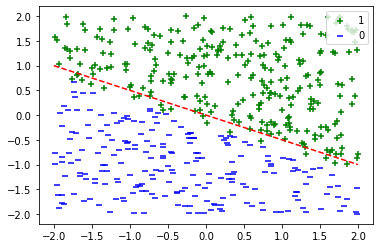

In [6]:
visualize_hyperplane(X_train, y_train, W_opt)

#### **<span style="color:#0b486b"> Now we define the logistic regression model </span>**

In [7]:
# Define the sigmoid function
def sigmoid(z):
    return 1.0/ (1.0 + np.exp(-z))

Below is the code for forward propagation w.r.t. the mini-batch $X$ or the set of data points $X$.

In [8]:
# Define the logistic regression model and the corresponding loss, which is similar to foward pass in deep neural networks
def forward(X= None, y=None, W= None, eps= 1E-10):
    z = X.dot(W)
    p = sigmoid(z)
    losses = [-np.log(p[i]+eps) if y[i]==1 else -np.log(1- p[i]+eps) for i in range(len(y))] 
    loss = np.mean(losses)
    return (z,p,loss)

In [9]:
W = np.array([[-1],[1]])
X, y = X_train, y_train
eps = 1e-10
z = X.dot(W)
p = sigmoid(z)
# losses_1 = [-np.log(p[i]+eps) if y[i]==1 else -np.log(1- p[i]+eps) for i in range(len(y))] 
# losses_2 = np.where(y==1, -np.log(p+eps), -np.log(1- p+eps))
# np.allclose(losses_1, losses_2)

Below is the code for backward propagation in which we compute the gradient of the loss of $X$ w.r.t. $W$. 

In [10]:
# Compute the gradient of the loss by the chain rule, which is similar to backpropagate in deep neural networks
def grad(X= None, y= None, z= None, p=None, eps= 1E-10):
    batch_size = len(y)
    grad_p = [-1.0/(p[i] + eps) if y[i]==1 else 1.0/(1-p[i]+ eps) for i in range(batch_size)]
    grad_p = np.array(grad_p).reshape([batch_size,1])
    grad_z = grad_p*p*(1-p)
    grad_W = X.transpose().dot(grad_z)*(1.0/batch_size)  # refer to the formula to compute the gradient in Section I
    return grad_W

#### **<span style="color:#0b486b"> Here we train our logistic regression model on the synthetic dataset with gradient descent</span>**

We consider three schemes:
- (i) Gradient descent in which we use the entire dataset (i.e., $X$ is the entire dataset) to compute the gradient.
- (ii) SGD in which we use mini-batches to compute gradient for which the mini-batches are uniformly sampled from the training set at each iteration.
- (iii) SGD in which we use mini-batches to compute gradient, but we first shuffle the training set, split the training set into many equal mini-batches with the same number of data points (i.e., $batch\_size$), and in each iteration we use a mini-batch to feed to the network. Although this mini-batch generating strategy is a bit diverge from the theory of SGD, it always obtains comparable performance compared to (ii), hence widely being used in training deep learning models.

In [11]:
from IPython.display import clear_output
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Visualize the hpyterplane and the training loss
def visualize_hyperplane_loss(X= None, y= None, W= None, losses= None): 
    X_pos = X[np.where(y ==1)[0]]
    X_neg = X[np.where(y ==0)[0]]
    clear_output(wait=True)
    
    plt.subplot(1,2,1)
    plt.scatter(X_pos[:,0], X_pos[:,1], label='1',  c='green', marker='+')
    plt.scatter(X_neg[:,0], X_neg[:,1], label='0', c='blue', marker='_')
    plt.legend(loc='upper right')
    
    f = lambda x1: -W[0,0]*x1/W[1,0] # Plot the decision boundary
    
    X1 = np.linspace(-2,2,500)
    plt.plot(X1, f(X1),  'r--')
    plt.subplot(1,2,2)
    plt.plot(losses, label = 'Epoch loss', marker='o')
    
    if len(losses):
        txt="Epoch %.2d W: [[%.3f], [%.3f]]; Loss: %.3f" % (len(losses), W[0,0], W[1,0], losses[-1])
        plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
        
    plt.show()

Below is the code for GD in (i).

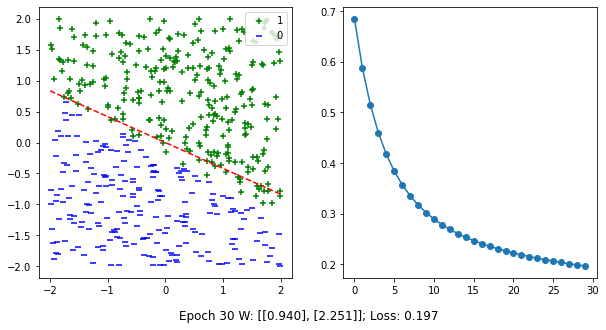

In [12]:
W = np.array([[-1],[1]])
lst_W1 = [copy.copy(W)]
epochs = 30
eta = 0.5
plt.ion()
losses = []
for epoch in range(epochs):
    X = X_train
    y= y_train
    z, p, loss= forward(X,y, W)
    losses.append(loss)
    # Compute gradient
    grad_W = grad(X,y,z,p)
    # Update coefficients with gradient descent
    W = W - eta*grad_W
    lst_W1.append(copy.copy(W))
    
    # We update the coefficients through all the data points
    visualize_hyperplane_loss(X_train, y_train, W, losses)
    plt.pause(0.5)
plt.ioff()

Below is the code for SGD with the strategy in (ii).

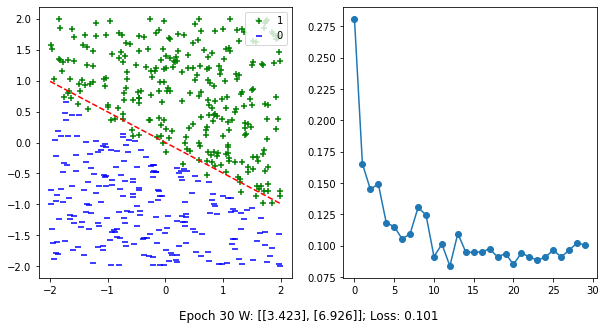

In [13]:
plt.ion()
W = np.array([[-1],[1]])
lst_W2 = [copy.copy(W)]
epochs =30
eta = 0.5
batch_size = 16
iter_per_epoch = int(N/batch_size)
epoch_losses= []
for epoch in range(epochs):
    losses =[]
    # We update the coefficients in each random batch
    for i in range(iter_per_epoch):
        # randomly sample a batch of data points
        idxs= np.random.choice(np.arange(N), batch_size, replace= False)
        X= X_train[idxs]
        y = y_train[idxs]
        z, p, batch_loss= forward(X, y,W)
        
        losses.append(batch_loss)
        grad_W = grad(X,y,z,p)
        W = W - eta*grad_W
        
    lst_W2.append(copy.copy(W))
    epoch_losses.append(np.mean(losses))
    visualize_hyperplane_loss(X_train, y_train, W, epoch_losses)
    plt.pause(0.5)
plt.ioff()

Below is the code for SGD with the strategy in (iii).

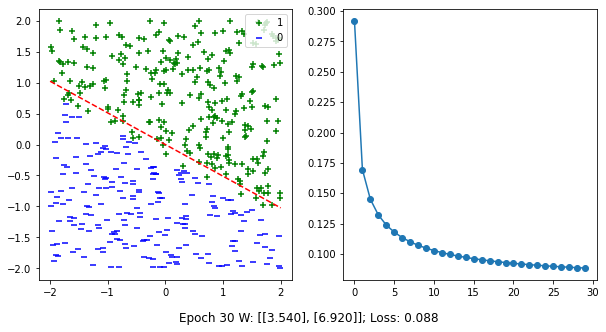

In [14]:
plt.ion()
W = np.array([[-1],[1]])
lst_W3 = [copy.copy(W)]
epochs =30
eta = 0.5
batch_size = 16 
iter_per_epoch = int(N/batch_size)
epoch_losses =[]

p = np.random.permutation(len(X_train))
X_train_shuff = X_train[p]
y_train_shuff = y_train[p]

for epoch in range(epochs):
    losses = []
    # We update the coefficients in each sequential batch
    for idx_start in range(0, N, batch_size):
        # We go through the batches sequencially, i.e., non-randomly
        idx_end = min(N, idx_start + batch_size)
        X= X_train_shuff[idx_start:idx_end]
        y= y_train_shuff[idx_start:idx_end]
        z, p, batch_loss= forward(X, y, W)
        
        losses.append(batch_loss)
        grad_W = grad(X, y, z,p)
        W = W - eta*grad_W
        
    lst_W3.append(copy.copy(W))
    epoch_losses.append(np.mean(losses))
    visualize_hyperplane_loss(X_train_shuff, y_train_shuff, W, epoch_losses)
    plt.pause(0.5)
plt.ioff()

We now visualize the trajectories of the models for three strategies (i), (ii), and (iii).

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
def visualize_W(lst_W1= None, lst_W2= None, lst_W3= None, k=1, W_opt= None):
    clear_output(wait=True)
    plt.plot([lst_W1[i][0] for i in range(k)],[lst_W1[i][1] for i in range(k)], "--s", markersize= 3, label='GD', color='green')
    plt.plot([lst_W2[i][0] for i in range(k)],[lst_W2[i][1] for i in range(k)], "--o", markersize= 3, label='SGD 1', color='blue')
    plt.plot([lst_W3[i][0] for i in range(k)],[lst_W3[i][1] for i in range(k)], "-->", markersize= 3, label='SGD 2', color='orange')
    
    # plot some optimal values W* 
    x = W_opt[0, 0] * np.linspace(0, 4, 10)
    y = W_opt[1, 0] * x
    plt.plot(x, y, "*", markersize= 10, label='W*', color='red')
    
    plt.legend(loc="upper left")
    plt.show()

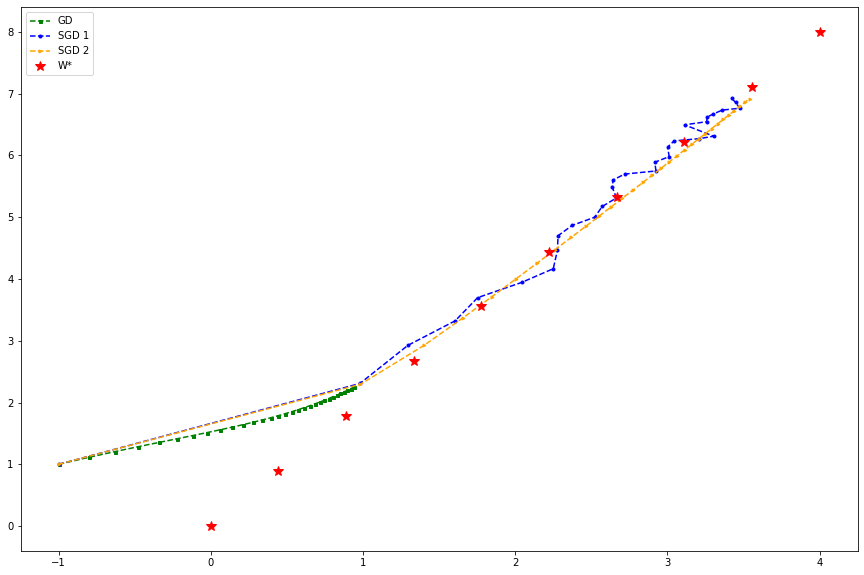

In [16]:
plt.ion()
for i in range(len(lst_W1)):
    visualize_W(lst_W1, lst_W2, lst_W3, i+1, W_opt)
    plt.pause(0.1)
plt.ioff()

**<span style="color:#0b486b"> Conclusion</span>**

- In this example, the performances of the 3 approaches are comparable with the same learning rate. 
- In terms of convergence, although GD has the better direction to downhill towards the global minima, its loss value is a bit higher than SGD (i) and (ii), which suggests a higher learning rate for GD. 
- During the training, SGD (i) and (ii) only compute the gradient on minibatches. This approximation makes noise and helps for escaping the saddle points/local minima/local maxima faster. However, a disadvantage of SGD is its oscillation, especially when setting with a high learning rate, which would take more time to converge. This motivates the researchers to develop better algorithms, namely, SGD with momentum, and later RMSprop, and Adam.

**<span style="color:red">Exercise 1</span>**: Try with smaller learning rates and different initial $W$ to compare the models obtained by three strategies in (i), (ii), and (iii). Report your observations.

Please try Exercise 1 by yourself.

**<span style="color:red">Exercise 2</span>**: Implement SGD with momentum (refer [here](https://ruder.io/optimizing-gradient-descent/)) and compare with the standard SGD in terms of the convergence rate to the optimal solution.

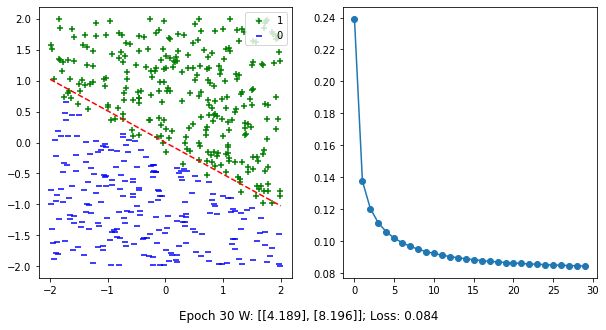

In [17]:
# Implementation of SGD with momentum
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.ion()
W = np.array([[-1],[1]])
lst_W4 = [copy.copy(W)]
epochs = 30
eta = 0.5
gamma = 0.5  # momentum
v= np.zeros_like(W)  # the initial velocity
batch_size = 16 
iter_per_epoch = int(N/batch_size)
epoch_losses =[]
for epoch in range(epochs):
    losses = []
    # We update the coefficients in each sequential batch
    for idx_start in range(0, N, batch_size):
        # We go through the batches sequencially, i.e., non-randomly
        idx_end = min(N, idx_start + batch_size)
        X= X_train[idx_start:idx_end]
        y= y_train[idx_start:idx_end]
        z, p, batch_loss= forward(X, y, W)
        
        losses.append(batch_loss)
        grad_W = grad(X, y, z,p)
        v = gamma*v + eta*grad_W
        W = W - v
        
    lst_W4.append(copy.copy(W))
    epoch_losses.append(np.mean(losses))
    visualize_hyperplane_loss(X_train, y_train, W, epoch_losses)
    plt.pause(0.5)
plt.ioff()

## <span style="color:#0b486b"> II. Conduct a DNN model on the MNIST dataset with SGD</span> <span style="color:red;  font-size: 18px">**** (important)</span>

This part shows you how to use gradients to build up flexible deep learning models with a composite loss: $loss1 + \alpha \times loss2 + \beta \times loss3$ where $\alpha>0$ and $\beta>0$ are two trade-off parameters and how to benefit from tensorflow dataset for shuffling a dataset, splitting a dataset into subsets, and batching a dataset.

In this example, we will build a DNN model for a classification problem. The dataset is the handwritten digits which has a training set of 60,000 examples, and a test set of 10,000 examples. Each image is an black-white image with resolution 28x28 pixels. The dataset splits to 10 classes (digit 0 to 9). The DNN model consits of 3 dense layers: $784 \rightarrow 20 (ReLU) \rightarrow 20 (ReLU) \rightarrow 10 (softmax)$. 

The objective loss is composited of two losses $L = L_1 + \alpha \times L_2$  where  
- $L_1$ is the standard cross entropy loss: $L_1 = -\sum_{i=1}^{10} y_i \log p_i$
- $L_2$ is the entropy loss which helps to encourage a more confident prediction (by minimizing the prediction entropy): $L_2 = - \sum_{i=1}^{10} p_i \log p_i$

### **<span style="color:#0b486b"> II.1 We first load the MNIST dataset in TensorFlow</span>**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
mnist = tf.keras.datasets.mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = mnist.load_data()

In [20]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full = X_train_full_img.reshape(num_train,-1)/255.0
X_test = X_test_img.reshape(num_test, -1)/255.0
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


### **<span style="color:#0b486b"> II.2 We build a deep neural network with several fully-connected layers</span>**

In [35]:
class DNN:
    def __init__(self, n_classes= 10, optimizer= tf.keras.optimizers.SGD(learning_rate= 0.001), 
                 batch_size= 32, epochs= 20, alpha=1.0, beta=1.0):
        self.n_classes= 10
        self.batch_size= batch_size
        self.epochs = epochs
        self.optimizer = optimizer
        self.alpha = alpha # hyper-parameter corresponding to entropy loss 
        self.beta = beta # hyper-parameter for the max-margin loss 
        
        # create a tensorflow dataset and shuffle
        self.train_full_set = tf.data.Dataset.from_tensor_slices((X_train_full, y_train_full)).shuffle(1000)
        self.test_full_set = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(1000, reshuffle_each_iteration=False)

        # take train and valid sets from full dataset
        self.train_set = self.train_full_set.take(50000)
        self.valid_set = self.train_full_set.skip(50000).take(10000)
        self.test_set = self.test_full_set.take(10000)
        # batching train and valid sets
        self.train_set= self.train_set.batch(self.batch_size).prefetch(1)
        self.valid_set= self.valid_set.batch(self.batch_size).prefetch(1)
        self.test_set = self.test_set.batch(self.batch_size).prefetch(1)
        tf.keras.backend.set_floatx('float64')
        
    def build(self):
        self.model= Sequential([Dense(20, activation='relu'), Dense(20, activation= 'relu'),
                               Dense(self.n_classes, activation= 'softmax')])
    
    def compute_loss(self, X, y): # X is data batch, y is label batch
        pred_probs = self.model(X)
        l1 =  tf.keras.losses.sparse_categorical_crossentropy(y, pred_probs) # Cross entropy loss   
        l2 = tf.reduce_sum(- pred_probs * tf.math.log(pred_probs), axis=-1) # Prediction entropy loss 
        
        assert (l1.shape == l2.shape)
        return l1 + self.alpha * l2
    
    def compute_grads(self, X, y):
        with tf.GradientTape() as g:  # use gradient tape to compute gradients
            loss= self.compute_loss(X,y)
        grads= g.gradient(loss, self.model.trainable_variables) # compute gradients w.r.t. all trainable variables
        return grads
    
    def train_one_batch(self, X, y): # train in one batch
        grads= self.compute_grads(X,y)
        # the gradients will be applied according to optimizer for example SGD, Adam, and etc.
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
    
    def evaluate(self, tf_dataset= None):
        dataset_loss = tf.keras.metrics.Mean()
        dataset_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
        for X,y in tf_dataset:
            loss = self.compute_loss(X,y)
            dataset_loss.update_state(loss)
            dataset_accuracy.update_state(y, self.model(X, training= False))
        return dataset_loss.result(), dataset_accuracy.result()
            
    
    def train(self):
        for epoch in range(self.epochs):
            for X,y  in self.train_set: # use batch_index if you want to display something in iterations
                self.train_one_batch(X,y)
            train_loss, train_acc = self.evaluate(self.train_set)
            valid_loss, valid_acc = self.evaluate(self.valid_set)
            print('Epoch {}: train acc={:.4f}, train loss={:.4f} | valid acc={:.4f}, valid loss= {:.4f}'.format(epoch +1, 
                                                                                                                train_acc, train_loss, 
                                                                                                                valid_acc, valid_loss))
    
    def test(self):
        test_loss, test_acc = self.evaluate(self.test_set)
        print('test acc={:.4f}, test loss={:.4f}'.format(test_acc, test_loss))

### **<span style="color:#0b486b"> II.3 Next we train the DNN on MNIST by SGD</span>**

In [36]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
dnn = DNN(optimizer=opt, epochs=10, batch_size=64)
dnn.build()

In [37]:
dnn.train()

Epoch 1: train acc=0.9121, train loss=0.5022 | valid acc=0.9191, valid loss= 0.4576
Epoch 2: train acc=0.9315, train loss=0.3726 | valid acc=0.9356, valid loss= 0.3529
Epoch 3: train acc=0.9446, train loss=0.3049 | valid acc=0.9474, valid loss= 0.2987
Epoch 4: train acc=0.9483, train loss=0.2843 | valid acc=0.9507, valid loss= 0.2846
Epoch 5: train acc=0.9489, train loss=0.2755 | valid acc=0.9476, valid loss= 0.2934
Epoch 6: train acc=0.9546, train loss=0.2449 | valid acc=0.9536, valid loss= 0.2604
Epoch 7: train acc=0.9622, train loss=0.2065 | valid acc=0.9591, valid loss= 0.2343
Epoch 8: train acc=0.9518, train loss=0.2587 | valid acc=0.9479, valid loss= 0.2833
Epoch 9: train acc=0.9609, train loss=0.2075 | valid acc=0.9539, valid loss= 0.2415
Epoch 10: train acc=0.9651, train loss=0.1837 | valid acc=0.9580, valid loss= 0.2252


**<span style="color:red">Exercise 3</span>**: Extend the above class `DNN` to allow evaluating on the test set.

In [38]:
dnn.test()

test acc=0.9576, test loss=0.2353


**<span style="color:red">Exercise 4</span>**: Develop a feed-forward neural network to work with the MNIST dataset according to the following requirements:
- The architecture is $Input \rightarrow 20 (ReLU) \rightarrow 40 (ReLU) \rightarrow 20 (ReLU) \rightarrow  Output (softmax)$.
- Extend the code to allow doing grid search for tunining the learning rate in the list $[0.1, 0.01, 0.001]$ and optimizer in the list $[tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop(), tf.keras.optimizers.SGD(momentum=0.2)]$ and save the best model to the hard disk ([link](https://www.tensorflow.org/guide/keras/save_and_serialize)). Plot the training progress of the best model (e.g., training and valid accuracies, training and valid losses).
- Load the best model and evaluate on the test set.

In [39]:
X_train, y_train = X_train_full[0:50000], y_train_full[0:50000]
X_valid, y_valid = X_train_full[50000:], y_train_full[50000:]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


In [40]:
class NewDNN(tf.keras.Model):
    def __init__(self, num_classes= 10):
        super(NewDNN, self).__init__()
        self.num_classes = num_classes
        self.dense1 = tf.keras.layers.Dense(20, activation='relu')
        self.dense2 = tf.keras.layers.Dense(40, activation= 'relu')
        self.dense3 = tf.keras.layers.Dense(20, activation= 'relu')
        self.dense4 = tf.keras.layers.Dense(self.num_classes, activation= 'softmax')
    
    def call(self, inputs):
        h = self.dense1(inputs)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return h

We tune the learning rate using the validation data set.

In [41]:
lst_opts = [tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop(), tf.keras.optimizers.SGD(momentum=0.2)]
lst_learning_rates = [0.1, 0.01, 0.001]
best_acc= - np.inf
best_history = None
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

for opt in lst_opts:
    for lr in lst_learning_rates:
        dnn = NewDNN(num_classes=10)
        dnn.build(input_shape = (None, 784))
        opt.learning_rate = lr
        dnn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print("Training with optimizer = {}, learning rate = {}".format(opt.get_config()['name'], lr))
        history = dnn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)
        valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid)
        print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))
        if(valid_acc > best_acc):
            best_acc = valid_acc
            best_model = dnn
            best_opt = opt
            best_lr = lr
            best_history = history

print('\nThe best model is with optimizer = {}, learning rate = {}'.format(best_opt.get_config()['name'], best_lr))
best_model.save('my_model', save_format='tf')
print('Saved the best model to hard disk')

Training with optimizer = Adam, learning rate = 0.1
313/313 [==============================] - 0s 663us/step - loss: 1.5889 - accuracy: 0.3058
	valid acc = 0.3058, valid loss = 1.5888670295715333
Training with optimizer = Adam, learning rate = 0.01
313/313 [==============================] - 0s 588us/step - loss: 0.2789 - accuracy: 0.9239
	valid acc = 0.9239, valid loss = 0.2788515273988247
Training with optimizer = Adam, learning rate = 0.001
313/313 [==============================] - 0s 582us/step - loss: 0.1317 - accuracy: 0.9640
	valid acc = 0.964, valid loss = 0.13169938774593173
Training with optimizer = RMSprop, learning rate = 0.1
313/313 [==============================] - 0s 593us/step - loss: 2.3151 - accuracy: 0.0990
	valid acc = 0.099, valid loss = 2.3150508087158204
Training with optimizer = RMSprop, learning rate = 0.01
313/313 [==============================] - 0s 579us/step - loss: 0.8315 - accuracy: 0.8986
	valid acc = 0.8986, valid loss = 0.8315066361308098
Training wi

In [42]:
restored_model = tf.keras.models.load_model('my_model')
print('Evaluating the best model on the test set')
_, test_acc= restored_model.evaluate(X_test, y_test)
print('Test acc= {}'.format(test_acc))

Evaluating the best model on the test set
313/313 [==============================] - 0s 490us/step - loss: 0.1296 - accuracy: 0.9620
Test acc= 0.962


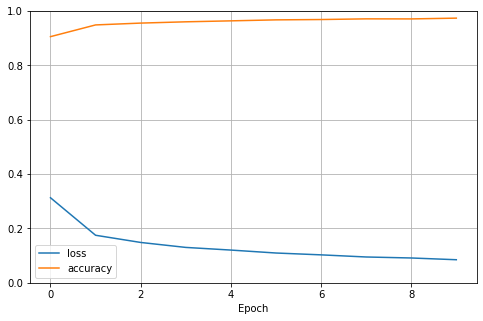

In [43]:
import pandas as pd

pd.DataFrame(best_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epoch") 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>